In [1]:
!pip install keras

# Loaded Libary

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras import utils
from keras.utils import to_categorical
from keras.datasets import mnist

# Load Datset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check Shape 

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

# Plot  numbers

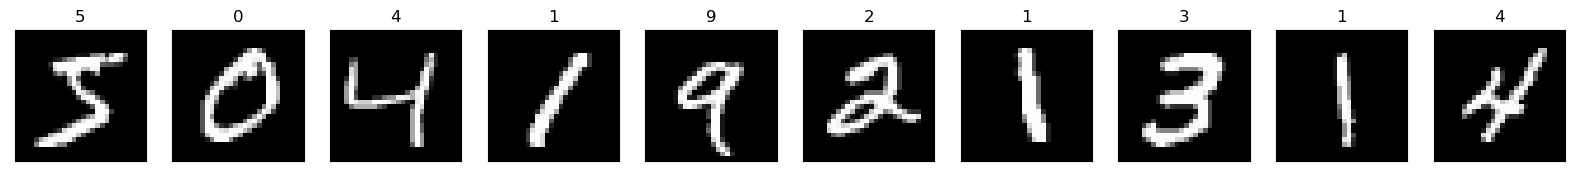

In [8]:
fig, ax = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = (20,4))
for i in range(10):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i], cmap = 'gray')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
plt.show()

# Change Output In Categorical Form

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_test.shape

(10000, 10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [16]:
!pip install pydot

In [17]:
utils.plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['acc'])

In [20]:
history = model.fit(X_train, y_train , validation_data = (X_test, y_test), epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8450 - acc: 0.3922 - val_loss: 1.5018 - val_acc: 0.5564
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3543 - acc: 0.5687 - val_loss: 1.2310 - val_acc: 0.6278
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1704 - acc: 0.6097 - val_loss: 1.0952 - val_acc: 0.6360
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0753 - acc: 0.6228 - val_loss: 1.0230 - val_acc: 0.6410
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0132 - acc: 0.6395 - val_loss: 0.9872 - val_acc: 0.6458
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9554 - acc: 0.6512 - val_loss: 0.9314 - val_acc: 0.6415
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9142 - acc: 0.6708 - val_loss: 0.9049 - val_acc: 0.7108
Epoch 8/25
1875/1875 [==============================] - 8s 4m

In [21]:
model.save('mnist_model.h5')

In [22]:
history.history

{'loss': [1.8449677228927612,
  1.3542883396148682,
  1.1703740358352661,
  1.0753108263015747,
  1.0132009983062744,
  0.955400824546814,
  0.9142165780067444,
  0.8826373219490051,
  0.8483441472053528,
  0.8126538991928101,
  0.7991359233856201,
  0.7967223525047302,
  0.7748172283172607,
  0.7572063207626343,
  0.7372747659683228,
  0.7125018239021301,
  0.6950021386146545,
  0.6650243401527405,
  0.6569433808326721,
  0.6547158360481262,
  0.6354639530181885,
  0.6270363330841064,
  0.6156091094017029,
  0.6001293063163757,
  0.6009127497673035],
 'acc': [0.39223334193229675,
  0.5687333345413208,
  0.609749972820282,
  0.6227999925613403,
  0.6394833326339722,
  0.651199996471405,
  0.6707666516304016,
  0.697783350944519,
  0.7016833424568176,
  0.7145166397094727,
  0.7215333580970764,
  0.7180500030517578,
  0.7407166957855225,
  0.7613666653633118,
  0.7754999995231628,
  0.7811999917030334,
  0.7978333234786987,
  0.814466655254364,
  0.8205000162124634,
  0.8232166767120361

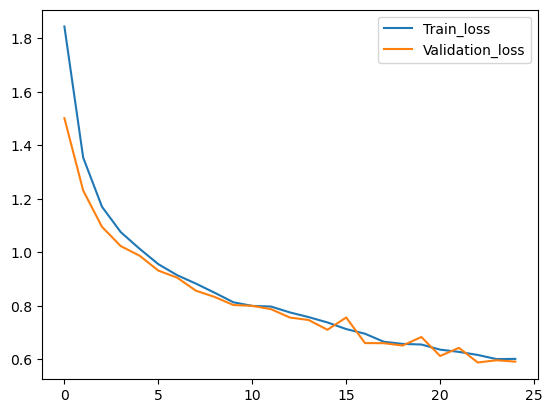

In [23]:
plt.plot(history.history['loss'], label = 'Train_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.legend()

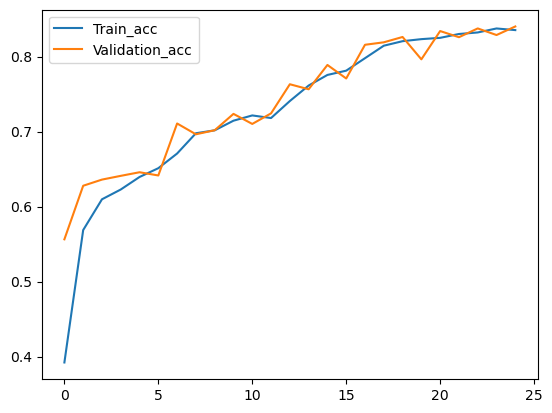

In [24]:
plt.plot(history.history['acc'], label = 'Train_acc')
plt.plot(history.history['val_acc'], label = 'Validation_acc')
plt.legend()

In [26]:
import keras

In [27]:
model = keras.models.load_model('mnist_model.h5')

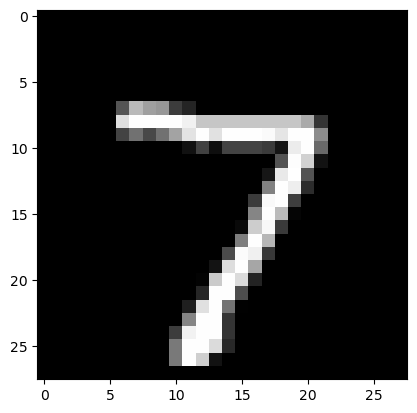

In [28]:
plt.imshow(X_test[0],cmap = 'gray')

In [30]:
import numpy as np

In [34]:
x = np.reshape(X_test[0],(1,28,28))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 283ms/step


7

In [35]:
model.predict(x)

1/1 [==============================] - 0s 54ms/step


array([[1.7309231e-04, 2.8669607e-04, 3.0584503e-03, 3.1270341e-05,
        3.2165828e-03, 2.6733591e-04, 3.3841288e-04, 9.7953701e-01,
        4.3371346e-04, 1.2657336e-02]], dtype=float32)